In [36]:
import numpy as np
import pandas as pd
from standalize import entropy
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler,StandardScaler

dataset = pd.read_csv('./datas/因果机制研究数据.csv',dtype={'股票代码':'object'})
# 行业代码用预筛选
def get_key(value):
    works={
        13: '农副食品加工业',
        14: '食品制造业',
        15: '酒、饮料和精制茶制造业',
        16: '烟草制品业',
        17: '纺织业',
        18: '纺织服装、服饰业',
        19: '皮革、毛皮、羽毛及其制品和制鞋业',
        20: '木材加工和木、竹、藤、棕、草制品业',
        21: '家具制造业',
        22: '造纸和纸制品业',
        23: '印刷和记录媒介复制业',
        24: '文教、工美、体育和娱乐用品制造业',
        25: '石油加工、炼焦和核燃料加工业',
        26: '化学原料和化学制品制造业',
        27: '医药制造业',
        28: '化学纤维制造业',
        29: '橡胶和塑料制品业',
        30: '非金属矿物制品业',
        31: '黑色金属冶炼和压延加工业',
        32: '有色金属冶炼和压延加工业',
        33: '金属制品业',
        34: '通用设备制造业',
        35: '专用设备制造业',
        36: '汽车制造业',
        37: '铁路、船舶、航空航天和其他运输设备制造业',
        38: '电气机械和器材制造业',
        39: '计算机、通信和其他电子设备制造业',
        40: '仪器仪表制造业',
        41: '其他制造业',
        42: '废弃资源综合利用业',
        43: '金属制品、机械和设备修理业'
    }
    return [k for k, v in works.items() if v == value]

invdic = {
    '创新能力':['研发投入', '创新产出'],
    '营运能力':['固定资产周转率','应收账款周转率', '应付账款周转率','非流动资产周转率','总资产周转率','现金及现金等价物周转率'],
    # '盈利能力':['固定资产净利润率','销售期间费用率','总资产净利润率', '净资产收益率'],
    '债偿能力':['现金资产比率','速动比率','资产负债率'],
    '风险能力':['财务杠杆','经营杠杆'],
    # '其他能力':['存货周转率','供应链集中度','员工收入增长率'],
    # '控制变量':['股票代码','截止日期',,'数字化转型程度(李寿喜)'  ]
}
dataset = dataset.drop('行业类别',axis=1).set_index(['股票代码', '截止日期'])
# dataset = dataset[dataset['行业代码']==get_key('农副食品加工业')[0]].drop('行业代码',axis=1)
scaler = MinMaxScaler()
scaler2 = StandardScaler()
dataset_ = pd.DataFrame(scaler.fit_transform(dataset.drop('数字化转型程度(李寿喜)', axis=1)),index=dataset.index,columns=dataset.columns.drop('数字化转型程度(李寿喜)'))
dataset_['数字化转型程度(李寿喜)'] = dataset['数字化转型程度(李寿喜)']
matrix = dataset_.reset_index()[['股票代码','截止日期','行业代码','股权性质','企业年限','企业规模','股权集中度','数字化转型程度(李寿喜)']]
for key in invdic.keys():
    metrix = dataset_.reset_index()[invdic[key]]
    w = entropy(metrix)
    matrix[key] = metrix.dot(w)
matrix = matrix.set_index(['股票代码','截止日期'])
matrix = pd.DataFrame(scaler2.fit_transform(matrix.drop('数字化转型程度(李寿喜)',axis=1)),index=matrix.index,columns=matrix.columns.drop('数字化转型程度(李寿喜)'))
matrix['数字化转型程度(李寿喜)'] = dataset['数字化转型程度(李寿喜)']
matrix

行业代码      股权性质      企业年限      企业规模     股权集中度      创新能力  \
股票代码   截止日期                                                               
000008 2015  0.831257 -0.719255  1.864191 -0.146814  0.131699 -1.312805   
       2016  0.831257  1.390327  2.004868  0.533195 -1.141403 -1.310220   
       2017  0.831257  1.390327  2.145546  0.751533 -0.945933 -0.722508   
       2018  0.831257  1.390327  2.286223  0.735013 -0.298967 -0.007309   
       2019  0.831257  1.390327  2.426900  0.850738 -0.648362  0.780551   
...               ...       ...       ...       ...       ...       ...   
688388 2022  1.106148 -0.719255 -0.949358  0.760547 -1.011537  1.146499   
688399 2019 -0.543199 -0.719255 -1.371391 -1.081566  0.153071  0.709872   
       2020 -0.543199 -0.719255 -1.230713 -0.521579  0.006461  0.249708   
       2021 -0.543199 -0.719255 -1.090036 -0.167741 -0.551661  0.644490   
       2022 -0.543199 -0.719255 -0.949358  0.108148 -0.662016  0.157021   

                 营运能力      债偿能力      风险能力  数字化转型程度(李寿喜)  
股票代码   截止日期                                              
000008 2015 -0.444160 -0.600513 -0.551359      0.025148  
       2016 -0.651588 -0.483652 -0.707076      0.024287  
       2017 -0.605194 -0.604696 -0.736651      0.029846  
       2018 -0.631021 -0.606052 -0.602107      0.086655  
       2019 -0.615666 -0.575603 -0.575037      0.146958  
...               ...       ...       ...           ...  
688388 2022 -0.477348  0.007580 -0.548862      0.007406  
688399 2019 -0.466550  1.698855 -0.610679      0.003295  
       2020  0.458514  0.703422 -0.774637      0.002392  
       2021 -0.017412  0.099419 -0.775001      0.006045  
       2022  0.291618  0.694406 -0.761056      0.007616  

[18038 rows x 10 columns]

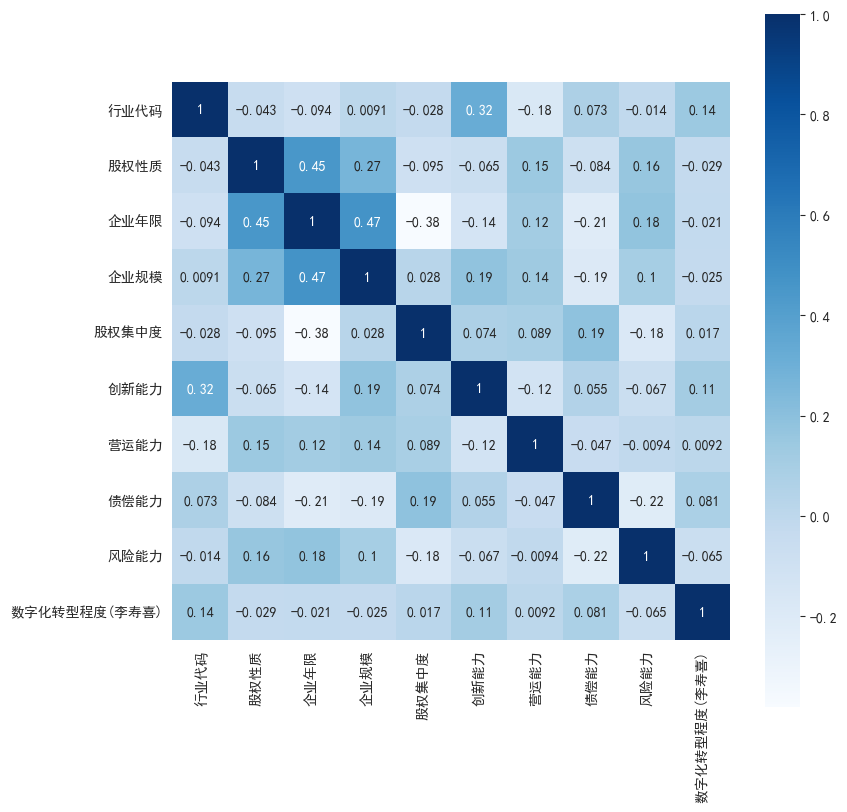

In [37]:
import seaborn as sns
import matplotlib.pylab as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

Xnames = matrix.columns
corrmat = matrix[Xnames].corr()
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(corrmat, square=True, cmap='Blues', annot=True)
plt.show()

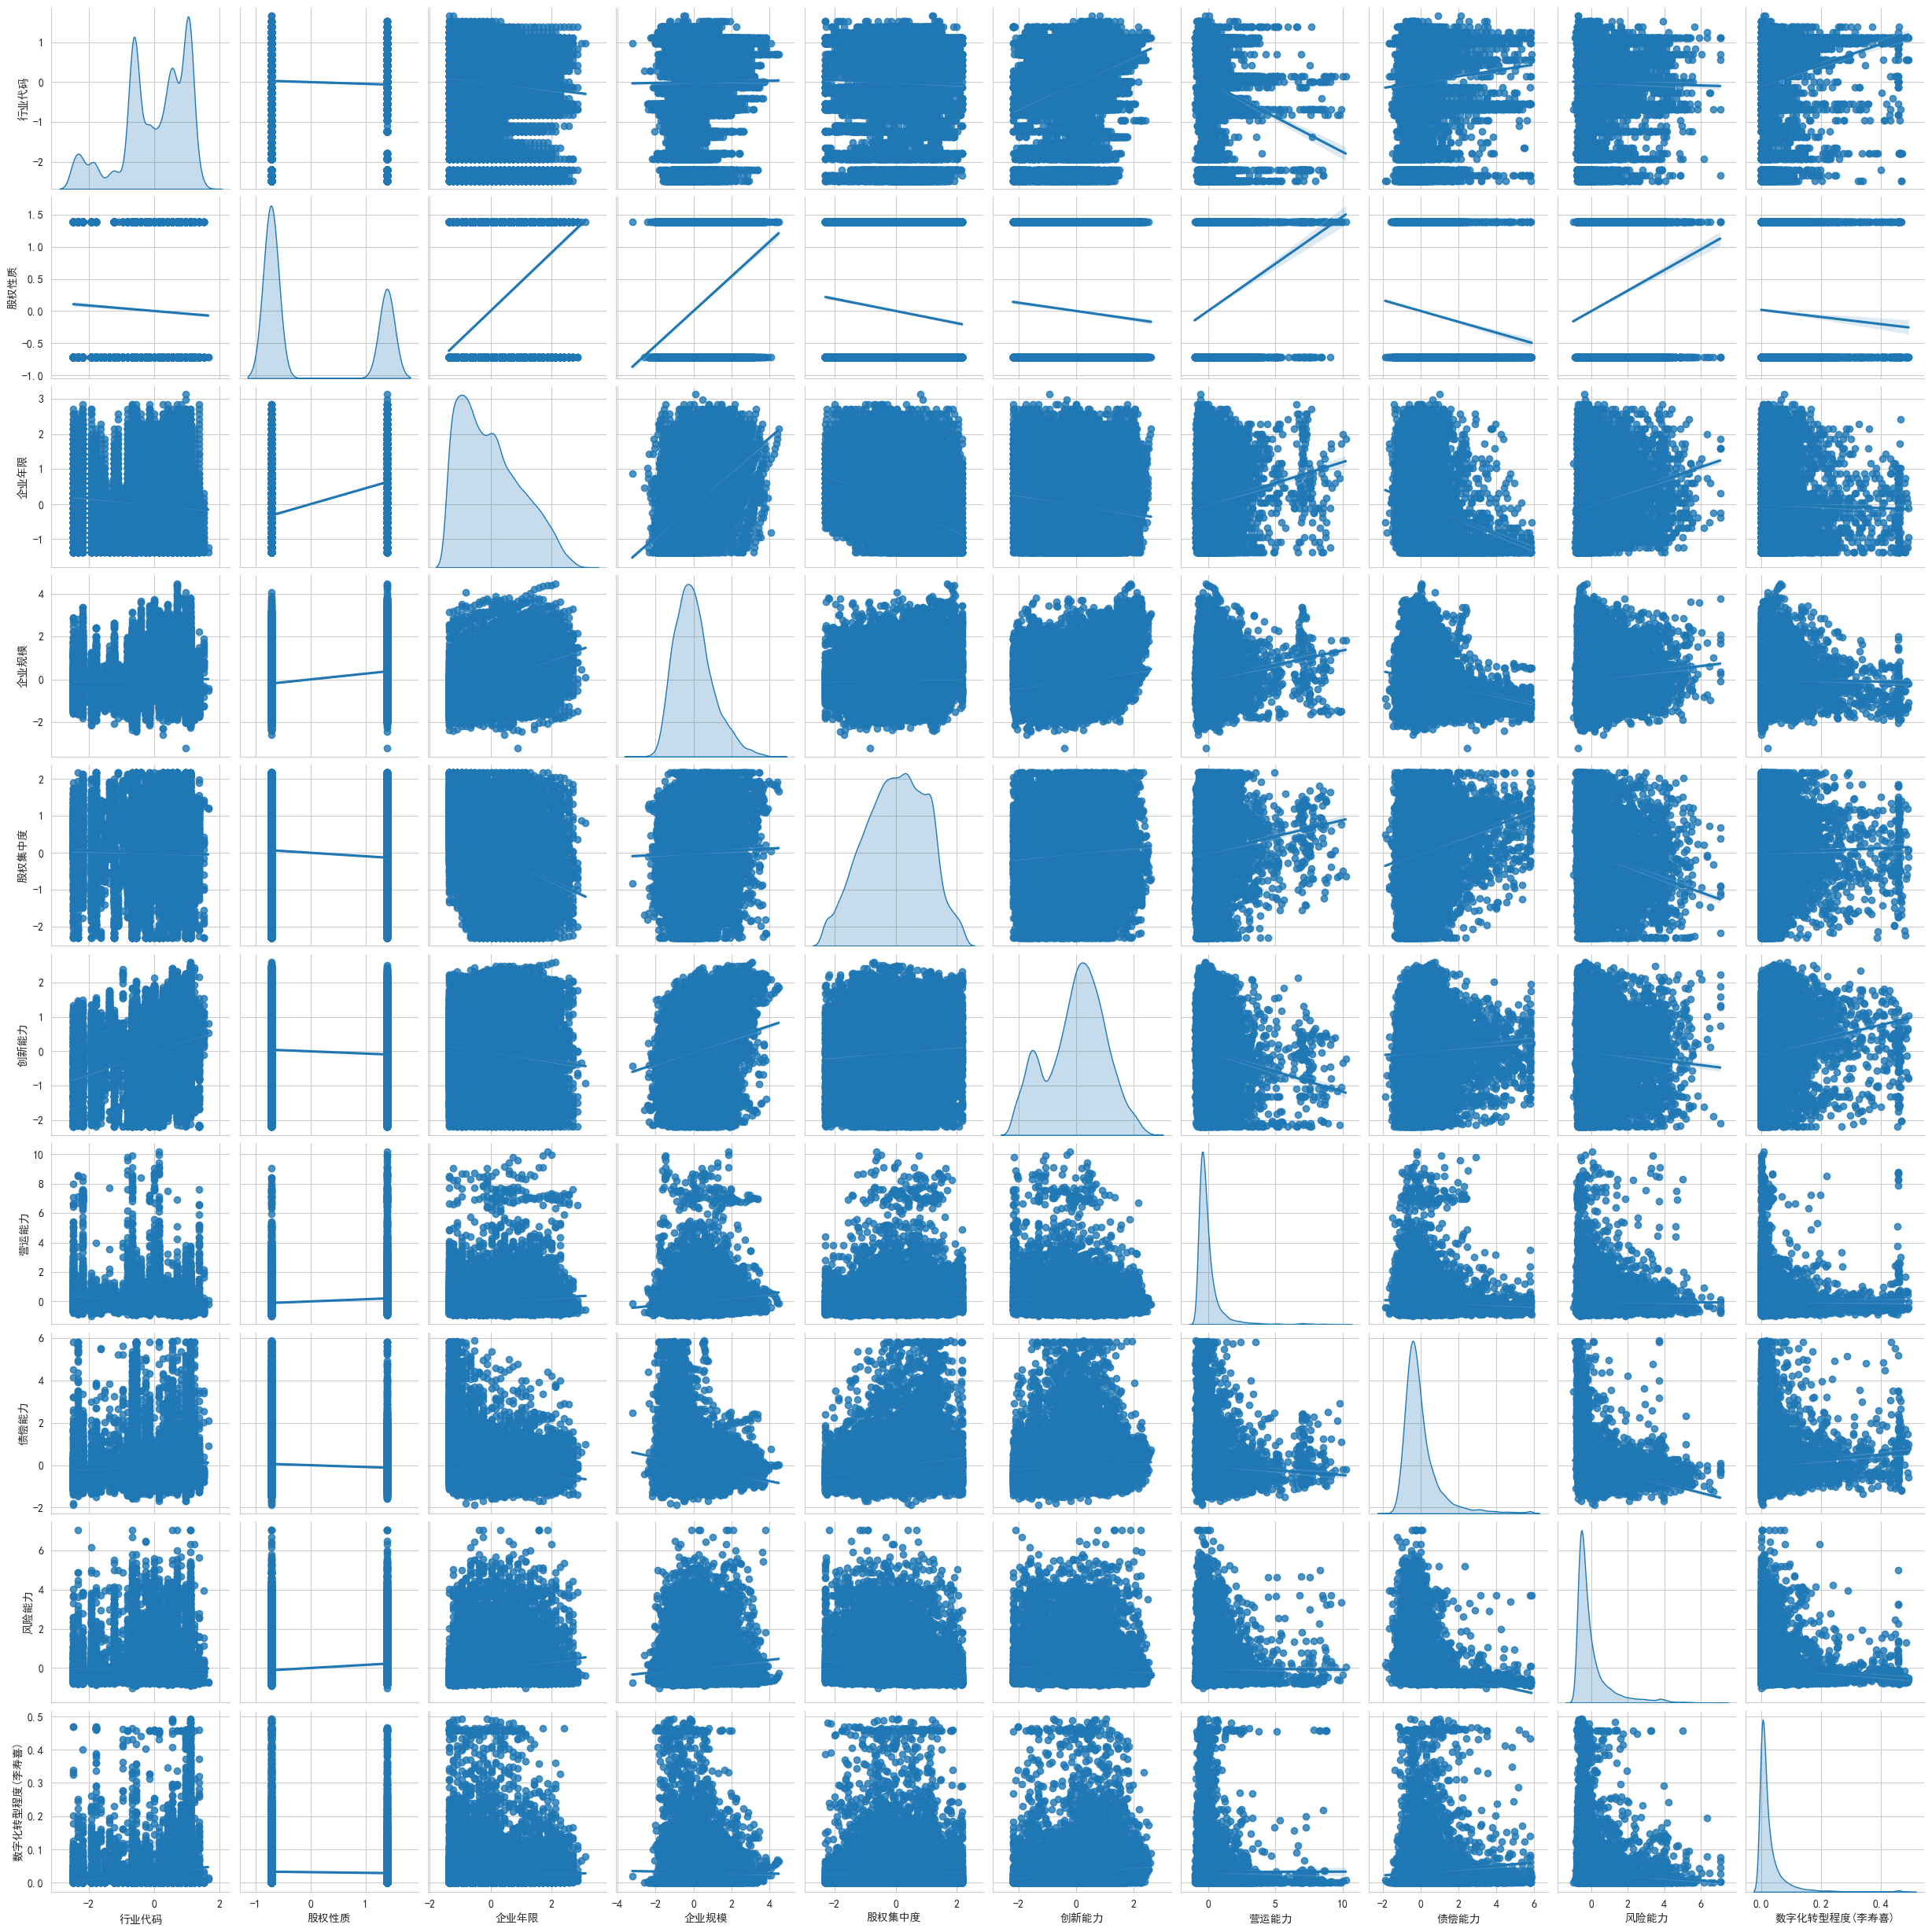

In [38]:
import numpy as np
matrix['数字化转型程度(李寿喜)'] = np.log(matrix['数字化转型程度(李寿喜)']+1)
sns.pairplot(matrix[Xnames], kind="reg", diag_kind="kde")
plt.show()

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
metrix = pd.get_dummies(matrix[Xnames])

# 当VIF<10,说明不存在多重共线性；当10<=VIF<100,存在较强的多重共线性，当VIF>=100,存在严重多重共线性
vif = [variance_inflation_factor(metrix, metrix.columns.get_loc(i)) for i in metrix.columns]
print(pd.Series(vif, index=Xnames,name='VIF系数'))

行业代码            1.164761
股权性质            1.299141
企业年限            1.999865
企业规模            1.559224
股权集中度           1.334003
创新能力            1.252913
营运能力            1.088494
债偿能力            1.125832
风险能力            1.100173
数字化转型程度(李寿喜)    1.033631
Name: VIF系数, dtype: float64


In [49]:
# import statsmodels.formula.api as smf
import statsmodels.api as sm
data = matrix.copy()

data.columns = [f'X{i}' for i in range(len(matrix.columns))]

data['intercept']=1
X = data[['intercept','X0','X1','X2','X3','X5','X6','X7','X8']]  # ,'X4'
y = data['X9']
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     X9   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     96.56
Date:                Tue, 19 Dec 2023   Prob (F-statistic):          4.78e-158
Time:                        20:15:03   Log-Likelihood:                 25576.
No. Observations:               18038   AIC:                        -5.113e+04
Df Residuals:                   18029   BIC:                        -5.106e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0311      0.000     71.249      0.0